In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

data = pd.read_csv('storms.csv')
print(data)

       Unnamed: 0   name  year  month  day  hour   lat  long  \
0               1    Amy  1975      6   27     0  27.5 -79.0   
1               2    Amy  1975      6   27     6  28.5 -79.0   
2               3    Amy  1975      6   27    12  29.5 -79.0   
3               4    Amy  1975      6   27    18  30.5 -79.0   
4               5    Amy  1975      6   28     0  31.5 -78.8   
...           ...    ...   ...    ...  ...   ...   ...   ...   
19061       19062  Wanda  2021     11    7     0  37.4 -37.4   
19062       19063  Wanda  2021     11    7     6  38.1 -36.4   
19063       19064  Wanda  2021     11    7    12  39.2 -34.9   
19064       19065  Wanda  2021     11    7    18  40.9 -32.8   
19065       19066  Wanda  2021     11    8     0  43.2 -29.7   

                    status  category  wind  pressure  \
0      tropical depression       NaN    25      1013   
1      tropical depression       NaN    25      1013   
2      tropical depression       NaN    25      1013   
3      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    19066 non-null  int64  
 1   name                          19066 non-null  object 
 2   year                          19066 non-null  int64  
 3   month                         19066 non-null  int64  
 4   day                           19066 non-null  int64  
 5   hour                          19066 non-null  int64  
 6   lat                           19066 non-null  float64
 7   long                          19066 non-null  float64
 8   status                        19066 non-null  object 
 9   category                      4684 non-null   float64
 10  wind                          19066 non-null  int64  
 11  pressure                      19066 non-null  int64  
 12  tropicalstorm_force_diameter  9554 non-null   float64
 13  h

In [ ]:
data.describe()

,Unnamed: 0,year,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
count,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,4684.000000,19066.000000,19066.000000,9554.000000,9554.000000
mean,9533.500000,2002.278926,8.698626,15.781968,9.094042,26.994252,-61.524300,1.898377,50.017413,993.554390,146.309399,14.811074
std,5504.024452,12.556517,1.352956,8.878563,6.733683,10.414302,21.062519,1.150590,25.501030,18.737342,156.006026,34.083358
min,1.000000,1975.000000,1.000000,1.000000,0.000000,7.000000,-109.300000,1.000000,10.000000,882.000000,0.000000,0.000000
25%,4767.250000,1993.000000,8.000000,8.000000,5.000000,18.400000,-78.700000,1.000000,30.000000,987.000000,0.000000,0.000000
50%,9533.500000,2004.000000,9.000000,16.000000,12.000000,26.600000,-62.250000,1.000000,45.000000,1000.000000,110.000000,0.000000
75%,14299.750000,2012.000000,9.000000,24.000000,18.000000,33.700000,-45.600000,3.000000,65.000000,1007.000000,220.000000,0.000000
max,19066.000000,2021.000000,12.000000,31.000000,23.000000,70.700000,13.500000,5.000000,165.000000,1024.000000,1440.000000,300.000000


In [ ]:
data = data[['long', 'lat', 'hour', 'wind', 'pressure', 'status']]

numeric_columns = ['long', 'lat', 'hour', 'wind', 'pressure']
categorical_columns = ['status']

label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])


imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7663


<ipython-input-5-b37c1556a35f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status'] = label_encoder.fit_transform(data['status'])
<ipython-input-5-b37c1556a35f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns] = imputer.fit_transform(data[numeric_columns])


In [ ]:
data = data[['long', 'lat', 'hour', 'wind', 'pressure', 'status']]

numeric_columns = ['long', 'lat', 'hour', 'wind', 'pressure']
categorical_columns = ['status']

label_encoder = LabelEncoder()
data['status'] = label_encoder.fit_transform(data['status'])
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

X = data[['long', 'lat', 'hour', 'wind', 'pressure']]
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

exp_data = [[0, 1, 1, 0, 1]]
predicted_label = model.predict(exp_data)
predicted_status = label_encoder.inverse_transform(predicted_label)

print(f"Predicted status: {predicted_status[0]}")

Accuracy: 0.7662587412587413
Predicted status: hurricane


<ipython-input-3-8d0ffe1f546e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['status'] = label_encoder.fit_transform(data['status'])
<ipython-input-3-8d0ffe1f546e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns] = imputer.fit_transform(data[numeric_columns])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[   0    0    0    3    0    0   37    8    1]
 [   0  331   26   59    0    0   79  138    0]
 [   0   28 1281    0    0    0    0   59    0]
 [   0   14    1  111    0    0  271   39    0]
 [   0    1    0    6    0    0   42    2    0]
 [   0    7    0    0    0    0    1   91    0]
 [   0    7    0   76    0    0  952   15    0]
 [   0   90   39    1    0    0  155 1708    2]
 [   0    0    0    0    0    0   37    2    0]]


In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.69      0.52      0.60       633
           2       0.95      0.94      0.94      1368
           3       0.43      0.25      0.32       436
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        99
           6       0.60      0.91      0.73      1050
           7       0.83      0.86      0.84      1995
           8       0.00      0.00      0.00        39

    accuracy                           0.77      5720
   macro avg       0.39      0.39      0.38      5720
weighted avg       0.74      0.77      0.74      5720



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1:.4f}")

F1 Score (Weighted): 0.7429


In [ ]:
exp_data = [[0, 1, 1, 0, 1]]  # Replace with your example data
predicted_label = model.predict(exp_data)
predicted_status = label_encoder.inverse_transform(predicted_label)
print(f"Predicted Status: {predicted_status[0]}")

Predicted Status: hurricane


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


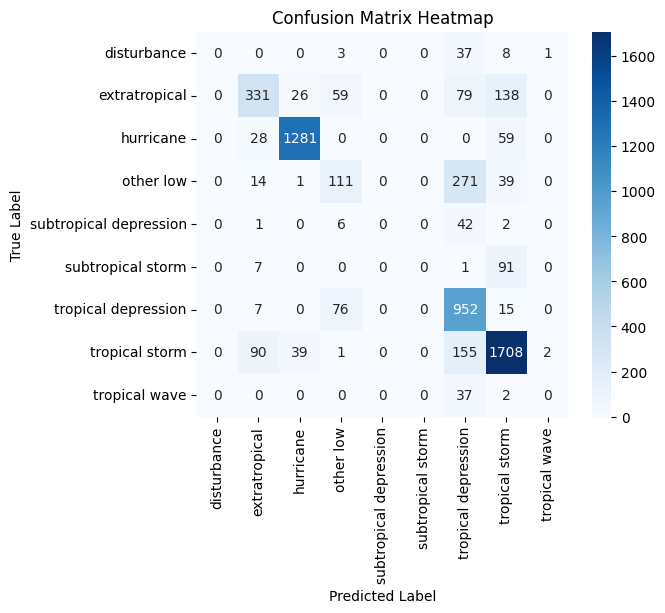

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()